In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy


# Load your data from CSV
data = pd.read_csv('2019-Dec.csv')

**1 Data Overview**

In [2]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [4]:
data.describe()

,product_id,category_id,price,user_id
count,3.533286e+06,3.533286e+06,3.533286e+06,3.533286e+06
mean,5.473054e+06,1.555023e+18,8.871856e+00,5.223318e+08
std,1.331331e+06,1.689262e+17,1.986474e+01,8.494819e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.180452e+06
25%,5.726191e+06,1.487580e+18,2.060000e+00,4.866830e+08
50%,5.811429e+06,1.487580e+18,4.210000e+00,5.566496e+08
75%,5.859462e+06,1.487580e+18,7.140000e+00,5.828019e+08
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08


**2. Data Cleaning** - Handling duplicates and missing entries

In [5]:
#Get sum of missing values for each column
data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [1]:
# Handling missing values
data['category_code'].fillna('unknown', inplace=True)
data['brand'].fillna('unknown', inplace=True)
data.dropna(subset=['user_session'], inplace=True)

NameError: name 'data' is not defined

In [8]:
#Get duplicate entries
data[data.duplicated(keep=False)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
36,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,unknown,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
37,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,unknown,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
54,2019-12-01 00:02:49 UTC,cart,5693501,1487580009445982239,unknown,unknown,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
55,2019-12-01 00:02:49 UTC,cart,5693501,1487580009445982239,unknown,unknown,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
59,2019-12-01 00:03:08 UTC,remove_from_cart,5839671,1487580005671109489,unknown,masura,2.19,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
...,...,...,...,...,...,...,...,...,...
3533172,2019-12-31 23:48:49 UTC,remove_from_cart,5917159,1783999072332415142,unknown,herbolive,21.83,355374962,1a0088ea-20b1-4788-b642-44f982881778
3533184,2019-12-31 23:50:26 UTC,remove_from_cart,5809910,1602943681873052386,unknown,grattol,5.24,459117441,801a753b-912f-4a0f-9f99-9c90419be144
3533185,2019-12-31 23:50:26 UTC,remove_from_cart,5809910,1602943681873052386,unknown,grattol,5.24,459117441,801a753b-912f-4a0f-9f99-9c90419be144
3533260,2019-12-31 23:57:22 UTC,remove_from_cart,5893695,1487580011585077370,unknown,ecocraft,6.97,588166646,e099adca-fec5-4aef-820f-6116836e322a


In [3]:
#Drop duplicates
data = data.drop_duplicates()

In [2]:
#Remove duplicates 
def remove_duplicates(data,event,entry):
    before_data = len(data)
    removecart_data = data[data.event_type==event]
    removecart_duplicates = len(removecart_data[removecart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)])
    print('Found {} duplicates'.format(removecart_duplicates))
    data = data[data.event_type!=event]
    removecart_data.drop_duplicates(subset=['product_id', 'user_id', 'user_session'], keep=entry, inplace=True)
    data = pd.concat([data, removecart_data])
    print('Data from {} rows reduced to {} rows'.format(before_data, len(data)))    
    data.sort_values(by=['event_time'])
    return data

In [5]:
# Apply duplicate removal for relevant events
data = remove_duplicates(data, 'remove_from_cart', 'last')
data = remove_duplicates(data, 'purchase', 'first')

Found 109397 duplicates


C:\Users\gokul\AppData\Local\Temp\ipykernel_33328\4025190276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removecart_data.drop_duplicates(subset=['product_id', 'user_id', 'user_session'], keep=entry, inplace=True)


Data from 3348712 rows reduced to 3289174 rows
Found 2802 duplicates


C:\Users\gokul\AppData\Local\Temp\ipykernel_33328\4025190276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removecart_data.drop_duplicates(subset=['product_id', 'user_id', 'user_session'], keep=entry, inplace=True)


Data from 3289174 rows reduced to 3287758 rows


**2. Data Visualisation for insights**

**2.1 Distribution of Main and sub categories**

In [36]:
#Category is split into two (Main and sub)
data[['main_category', 'sub_category']] = data['category_code'].str.split('.', n=1, expand=True)
data=data.drop(columns=['category_code'])

Function plot_cat plots pie chart for visualising main category and sub category. 
To plot main category, the user has to provide is_main_cat = 1, plot_type = count or percentage, and data. 
To plot sub category within specific main category, the user has to provide is_main_cat = 0, main_category name, plot_type = count or percentage, and data. 

In [33]:
def plot_cat(data,main_name,plot_type,is_main_cat):
    
    if is_main_cat == 1:
        cat_counts = data['main_category'].value_counts()
        title = 'Distribution of Main Categories'
    else:
        sub_cat_data = data[data['main_category'] == main_name]
        cat_counts = sub_cat_data['sub_category'].value_counts()
        title = f'Distribution of Sub-Categories in {main_name}'
    
    if plot_type == 'percentage':
        cat_percent = (cat_counts / cat_counts.sum()) * 100
        plot_data = cat_percent
        plot_labels = [f'{label} ({percent:.2f}%)' for label, percent in zip(cat_counts.index, cat_percent)]
        autopct_format = '%1.1f%%'  

    else:
        plot_data = cat_counts
        plot_labels = [f'{label} ({count})' for label, count in zip(cat_counts.index, cat_counts)]
        autopct_format = lambda p: '{:.0f}'.format(p * sum(plot_data) / 100) 

    # Plot the donut chart
    plt.figure(figsize=(5, 3))
    plt.pie(plot_data, labels=plot_labels, autopct=autopct_format, startangle=140, wedgeprops=dict(width=0.7))

    plt.title(f'{title} ({plot_type.capitalize()})')
    plt.axis('equal') 
    plt.show()

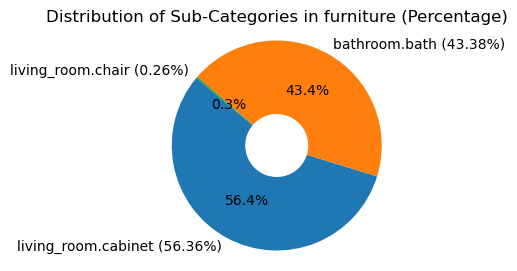

In [38]:
plot_cat(data,'furniture','percentage',0)

**2.2 Time distribution analysis**

In [ ]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['date'] = pd.to_datetime(data['event_time'].dt.date)
data['hour'] = data['event_time'].dt.hour
data['day_of_week'] = data['event_time'].dt.dayofweek
data['time'] = data['event_time'].dt.time
data.sort_values(by=['date', 'time'])
data['date'] = pd.to_datetime(data['date'])

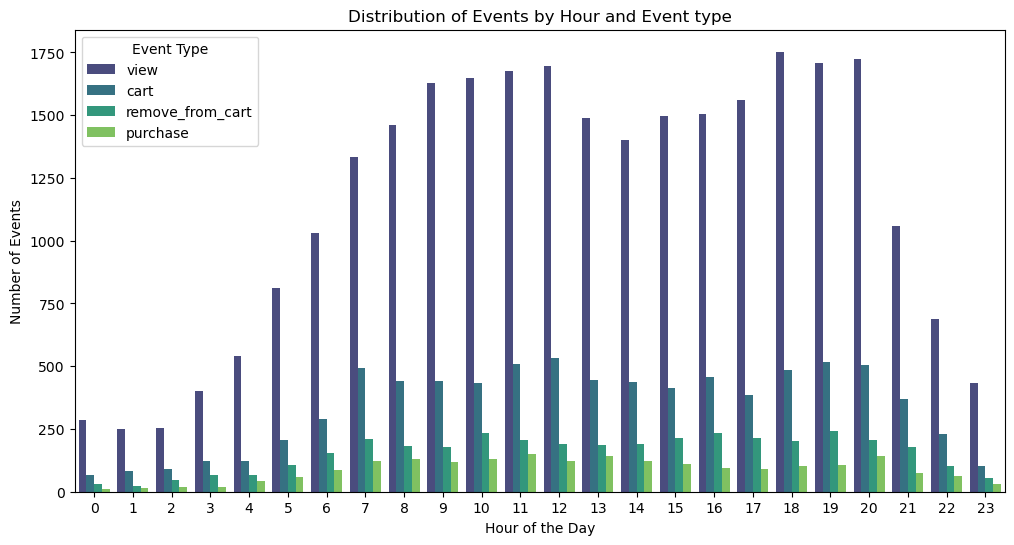

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='event_type', data=data, palette='viridis')
plt.title('Distribution of Events by Hour and Event type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(range(24))
plt.legend(title='Event Type')
plt.show()

**2.3 Day of the week distribution analysis**

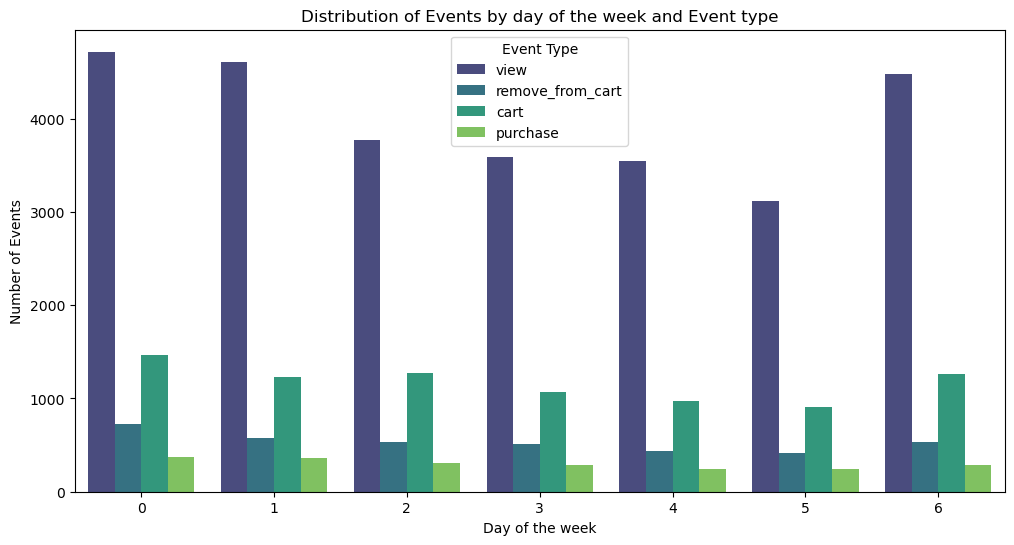

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='event_type', data=data, palette='viridis')
plt.title('Distribution of Events by day of the week and Event type')
plt.xlabel('Day of the week')
plt.ylabel('Number of Events')
plt.xticks(range(7))
plt.legend(title='Event Type')
plt.show()

**3. Feature Engineering**

In [6]:
data['event_time'] = pd.to_datetime(data['event_time'])
# Feature: event type count within session
session_agg = data.groupby('user_session').agg({
    'event_type': [
        'count', 
        lambda x: sum(x == 'view'), 
        lambda x: sum(x == 'cart'), 
        lambda x: sum(x == 'remove_from_cart'), 
        lambda x: sum(x == 'purchase')
    ],
    'product_id': 'nunique',
    'category_id': 'nunique',
    'price': ['sum', 'mean', 'max', 'min', 'median'],
    'event_time': [lambda x: (x.max() - x.min()).total_seconds(), 'min']
})

In [7]:
# Rename columns
session_agg.columns = ['total_events', 'view_count', 'cart_count', 'remove_count', 'purchase_count',
                       'unique_products', 'unique_categories', 'total_price', 'avg_price', 
                       'max_price', 'min_price', 'median_price', 'session_duration', 'session_start']

In [8]:
# Add ratio features
session_agg['cart_to_view_ratio'] = session_agg['cart_count'] / session_agg['view_count']
session_agg['purchase_to_cart_ratio'] = session_agg['purchase_count'] / session_agg['cart_count']

# Fill NaN values with 0 (for sessions where there are no views or carts)
session_agg.fillna(0, inplace=True)

In [9]:
# Time-based features
session_agg['hour'] = session_agg['session_start'].dt.hour
session_agg['day'] = session_agg['session_start'].dt.day
session_agg['month'] = session_agg['session_start'].dt.month
session_agg['day_of_week'] = session_agg['session_start'].dt.dayofweek
# Drop session_start as it is no longer needed
session_agg.drop(columns='session_start', inplace=True)

In [10]:
# Product and Category Interactions
session_agg['most_freq_category'] = data.groupby('user_session')['category_code'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')
session_agg['most_freq_brand'] = data.groupby('user_session')['brand'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

In [11]:
# Encode categorical features
le_category = LabelEncoder()
le_brand = LabelEncoder()
session_agg['most_freq_category'] = le_category.fit_transform(session_agg['most_freq_category'])
session_agg['most_freq_brand'] = le_brand.fit_transform(session_agg['most_freq_brand'])

In [1]:
# Calculate diversity scores (entropy) for products, categories, and brands
def calc_entropy(series):
    counts = series.value_counts()
    return entropy(counts)

session_agg['product_entropy'] = data.groupby('user_session')['product_id'].agg(calc_entropy)
session_agg['category_entropy'] = data.groupby('user_session')['category_code'].agg(calc_entropy)
session_agg['brand_entropy'] = data.groupby('user_session')['brand'].agg(calc_entropy)


KeyboardInterrupt: 

In [13]:
# Time since last interaction
data['time_since_last_event'] = data.groupby('user_session')['event_time'].diff().dt.total_seconds().fillna(0)
session_agg['avg_time_between_events'] = data.groupby('user_session')['time_since_last_event'].mean()


In [14]:
# User history (if available)
user_history_agg = data.groupby('user_id').agg({
    'event_type': ['count', lambda x: sum(x == 'view'), lambda x: sum(x == 'cart'), lambda x: sum(x == 'remove_from_cart'), lambda x: sum(x == 'purchase')],
    'product_id': 'nunique',
    'category_id': 'nunique',
    'price': ['sum', 'mean'],
})

# Rename columns
user_history_agg.columns = ['user_total_events', 'user_view_count', 'user_cart_count', 'user_remove_count', 'user_purchase_count',
                            'user_unique_products', 'user_unique_categories', 'user_total_price', 'user_avg_price']

In [15]:
# Merge user history with session data
session_data = session_agg.merge(data[['user_session', 'user_id']].drop_duplicates(), on='user_session').merge(user_history_agg, on='user_id').drop(columns=['user_id'])


In [16]:
# Merge session features with target variable
data['is_purchase'] = data['event_type'] == 'purchase'
session_purchase = data.groupby('user_session')['is_purchase'].max()
session_data = session_data.merge(session_purchase, on='user_session')

In [17]:
session_data.head()

,user_session,total_events,view_count,cart_count,remove_count,purchase_count,unique_products,unique_categories,total_price,avg_price,...,user_total_events,user_view_count,user_cart_count,user_remove_count,user_purchase_count,user_unique_products,user_unique_categories,user_total_price,user_avg_price,is_purchase
0,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,2,0,0,0,1,1,11.42,5.71,...,817,794,14,9,0,407,50,3689.13,4.515459,False
1,000cb41f-e9a0-43b6-9009-26fd246d21ed,1,1,0,0,0,1,1,6.03,6.03,...,817,794,14,9,0,407,50,3689.13,4.515459,False
2,00308653-1a42-4c28-aba6-87f8ccdc45a2,1,1,0,0,0,1,1,4.29,4.29,...,817,794,14,9,0,407,50,3689.13,4.515459,False
3,0147bdc2-756c-4e46-b3bd-ed1227a51473,1,1,0,0,0,1,1,4.44,4.44,...,817,794,14,9,0,407,50,3689.13,4.515459,False
4,016a5258-d837-417e-8939-2253ece429d9,2,2,0,0,0,1,1,11.12,5.56,...,817,794,14,9,0,407,50,3689.13,4.515459,False


In [46]:
session_data.to_csv('Session_processed.csv')